In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [5]:
df = pd.read_csv(r"C:\Users\Will\Desktop\Project\Credict_card_fraud_detection\data\raw\creditcard.csv")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [7]:
df.shape

(1001, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

#### To understand this dataset, some checks and visualization to spot patterns or issues.
Class distribution: checking for imbalance between fraud and non-fraud cases. 
    

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

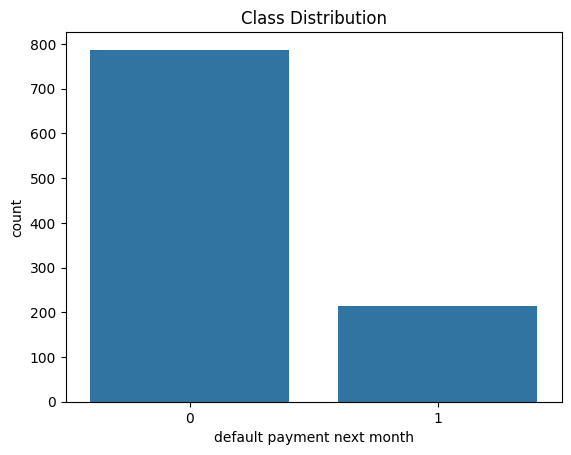

In [14]:
sns.countplot(data=df, x='default payment next month')  
plt.title("Class Distribution")
plt.show()

### Trying resampling technique to  help with the inbalance in class


In [18]:
from sklearn.utils import resample

# seperate majority and minority classes
df_majority = df[df['default payment next month'] == 0]
df_minority = df[df['default payment next month'] == 1]

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  
                                 n_samples=len(df_majority),   
                                 random_state=42)  



In [21]:

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [22]:
df_balanced

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
466,390000,2,3,2,35,0,0,0,0,0,...,252195,257496,263018,13802,16525,8893,9229,10000,9435,1
171,130000,1,3,1,56,1,2,2,2,2,...,68557,72796,71345,3000,3000,3000,5500,0,0,1
62,10000,1,2,1,56,2,2,2,0,0,...,4062,4196,4326,2300,0,150,200,200,160,1
681,360000,1,1,1,47,-1,-1,-1,0,-1,...,174397,4852,4125,0,177671,3508,4876,4188,10007,0
654,80000,2,1,2,23,0,0,0,0,0,...,14556,0,1460,4500,2011,3105,0,1460,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,20000,2,1,2,25,0,0,2,0,0,...,15824,15761,12510,2800,0,4000,1700,1000,2000,1
518,360000,1,1,2,28,-1,-1,-1,0,0,...,125984,106584,125557,390,75720,62520,17000,132200,167000,1
348,380000,1,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
542,220000,2,1,1,41,1,-2,-2,-2,-2,...,-65,-65,-200,0,0,0,0,0,0,1


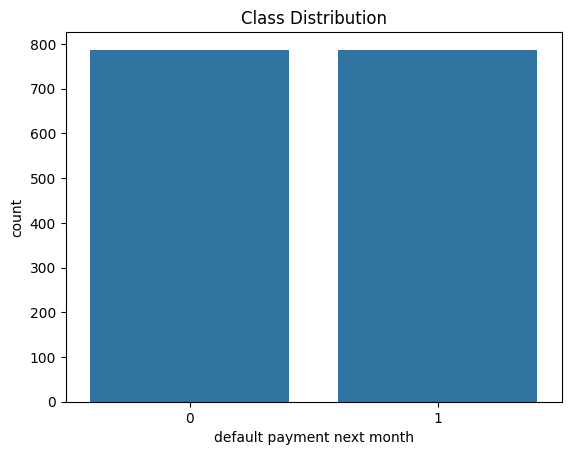

In [23]:
sns.countplot(data=df_balanced, x='default payment next month')  
plt.title("Class Distribution")
plt.show()

In [24]:
# from imblearn.over_sampling import SMOTE  # generates synthetic samples rather than duplicates.

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

Use metrics that focus on the minority class, such as F1 Score, Precision, Recall, and AUC-PR. Accuracy can be misleading in imbalanced datasets.

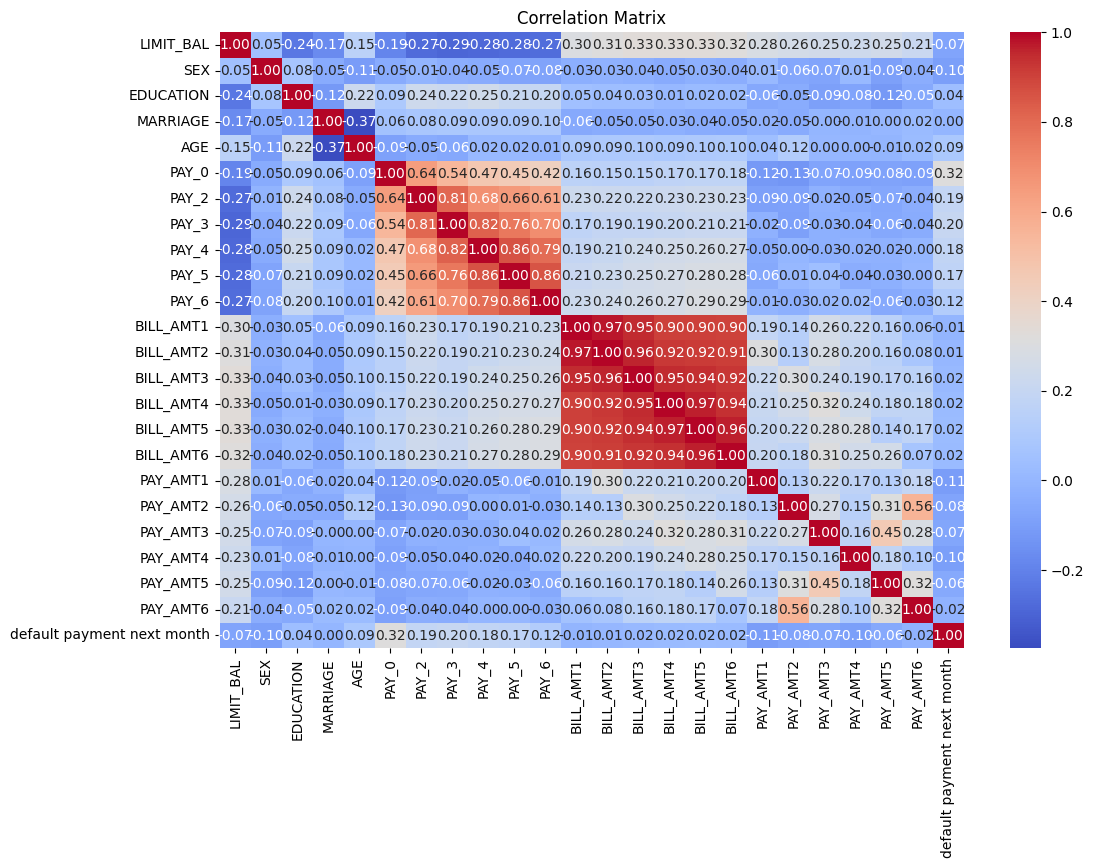

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_balanced.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


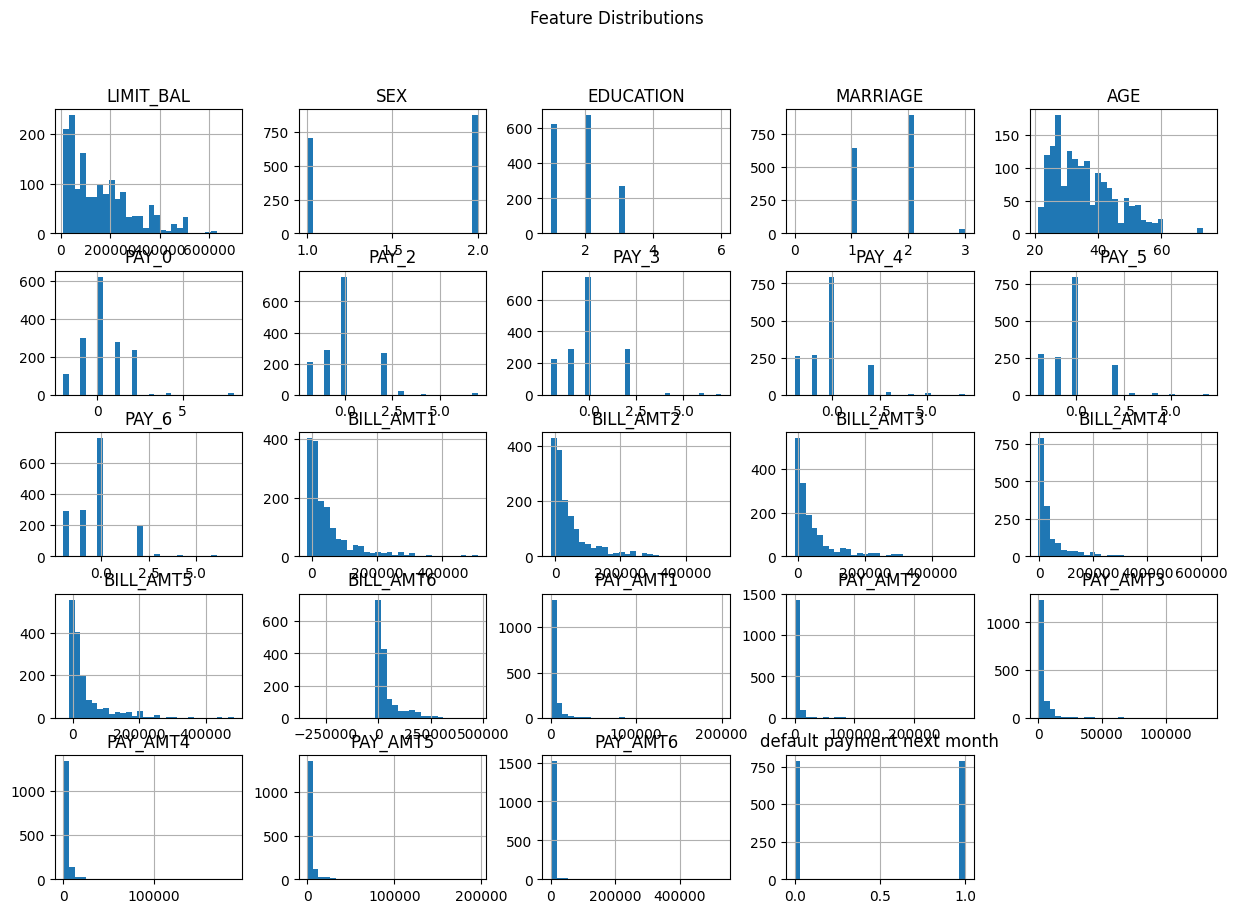

In [28]:
df_balanced.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


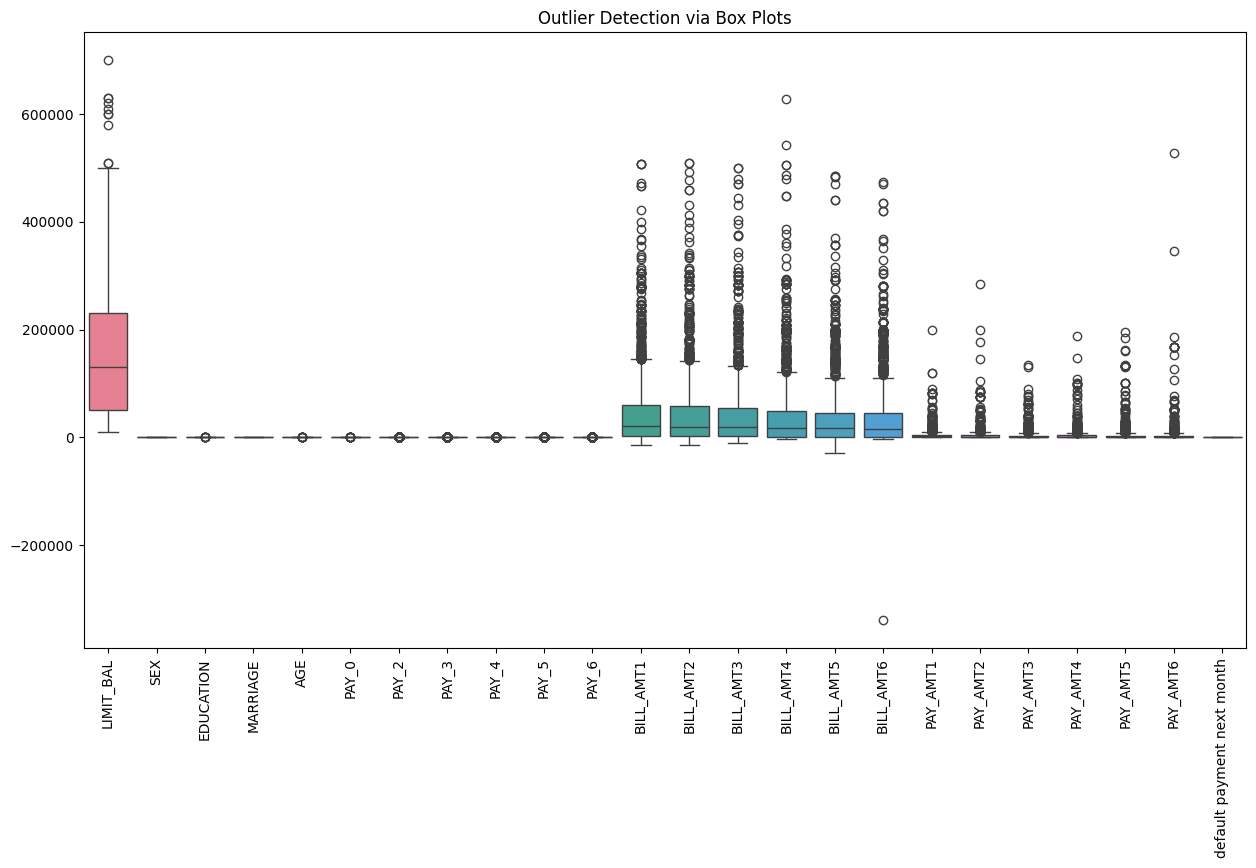

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_balanced)
plt.xticks(rotation=90)
plt.title("Outlier Detection via Box Plots")
plt.show()


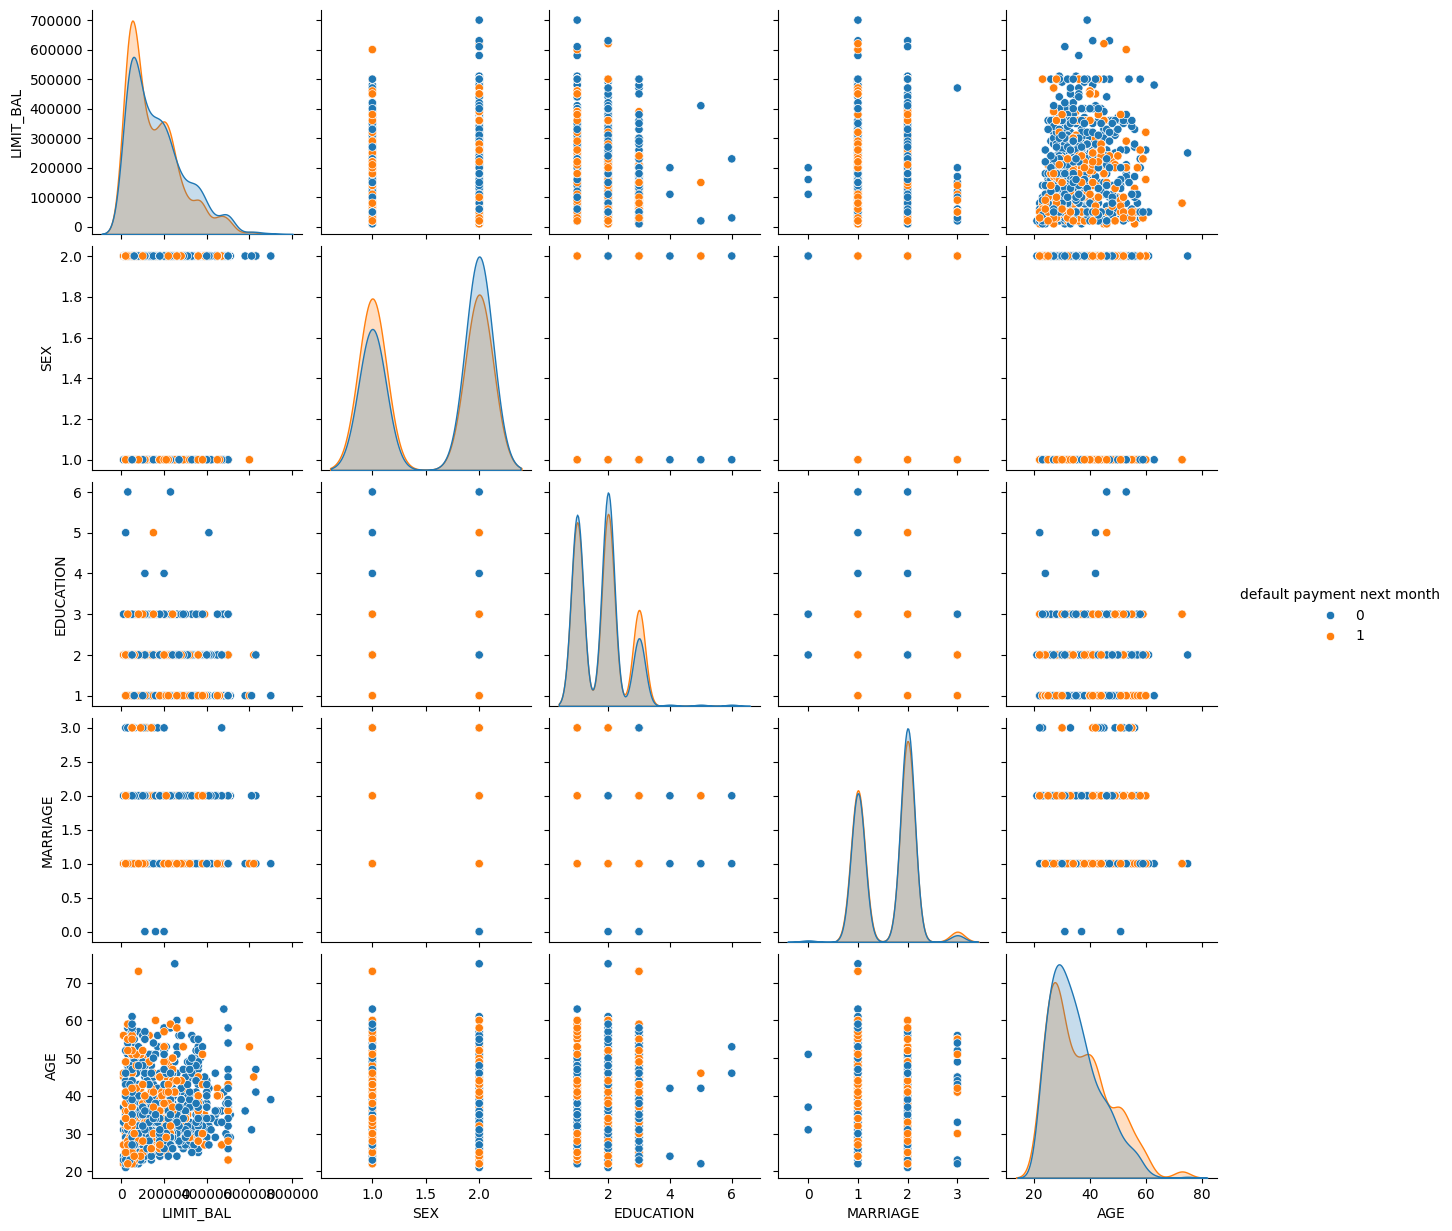

In [33]:
sns.pairplot(df_balanced, hue="default payment next month", vars=df_balanced.columns[:5])  # Adjust 'vars' as needed for your data
plt.show()
